In [194]:
import numpy as np
from util import *
from softmax_np import *

In [195]:
#Xu ly data:
train_x, train_y, val_x, val_y, test_x, test_y = get_mnist_data()
num_train = train_x.shape[0]
num_val = val_x.shape[0]
num_test = test_x.shape[0]  
train_y = create_one_hot(train_y)
val_y = create_one_hot(val_y)
test_y = create_one_hot(test_y)
#normalize
train_x, val_x, test_x = normalize(train_x, val_x, test_x)
#reshape
train_x = add_one(train_x) 
val_x = add_one(val_x)
test_x = add_one(test_x)
#x2=np.array([[0,1,2],[0,2,3]])
#number of neural
n_h1=300
num_samples=train_y.shape[1]

Reading fashion MNIST data...
<class 'numpy.ndarray'>
Done reading


In [196]:
num_hidden = 1 #So lop layer an 
hidden_lay = [200] 
num_sample = train_y.shape[0]
#Khoi tao neural 2 lop an
w_shape = (train_x.shape[1],hidden_lay[0])
W1 = np.random.normal(0, np.sqrt(2./np.sum(w_shape)), w_shape)
w_shape = (hidden_lay[0],train_y.shape[1])
W3 = np.random.normal(0, np.sqrt(2./np.sum(w_shape)), w_shape)

In [197]:
#Hàm softmax để tính với 10 ngõ ra
def softmax(x):
    z_max = np.max(x,axis=1,keepdims=True)
    z_quote = np.exp(x-z_max)
    softmax = z_quote/np.sum(z_quote,axis=1,keepdims=True)
    return  softmax

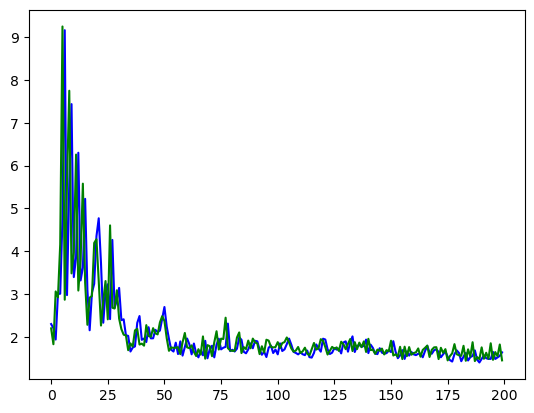

Epoch 200: loss is 1.4513695049628048


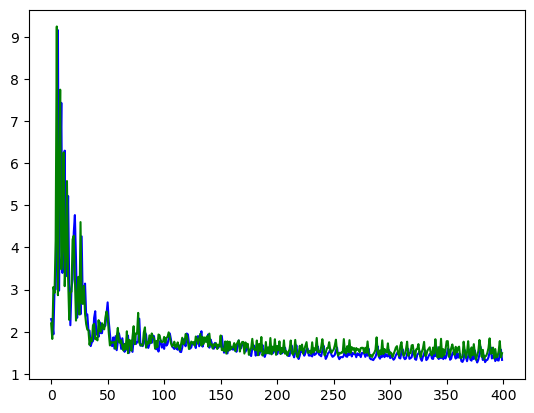

Epoch 400: loss is 1.490537513656515


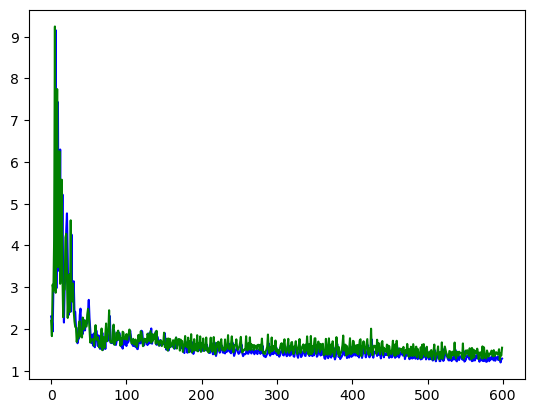

Epoch 600: loss is 1.550392956962754


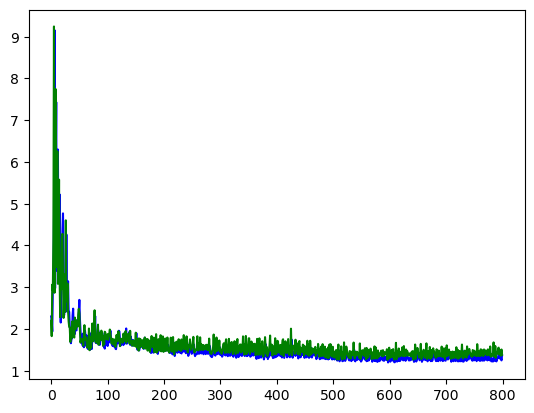

Epoch 800: loss is 1.3784208196804169


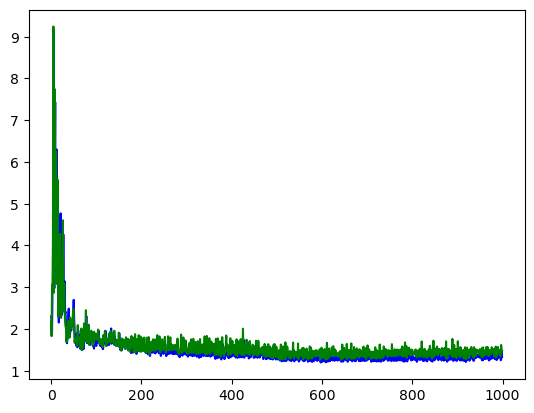

Epoch 1000: loss is 1.4766584669134173


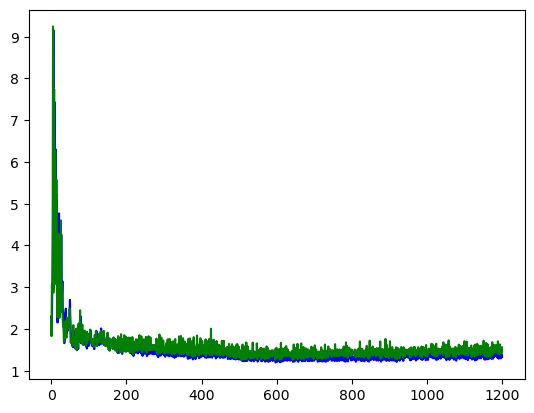

Epoch 1200: loss is 1.5591662016352221


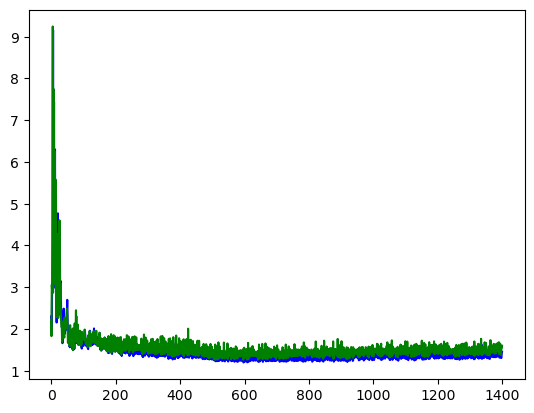

Epoch 1400: loss is 1.5994487560055881


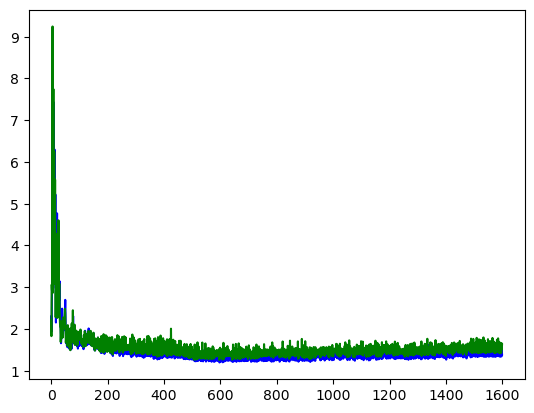

Epoch 1600: loss is 1.6273213924353132


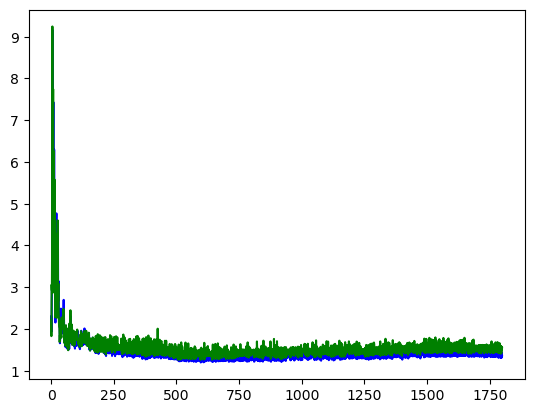

Epoch 1800: loss is 1.546495810996361


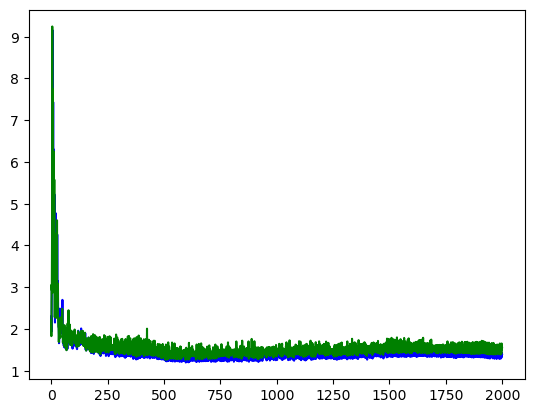

Epoch 2000: loss is 1.5471908689279377


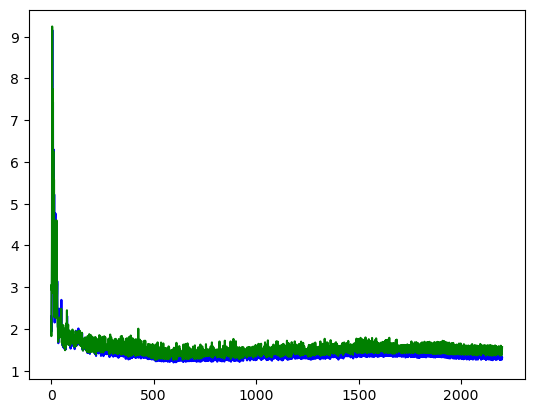

Epoch 2200: loss is 1.5663275853155192


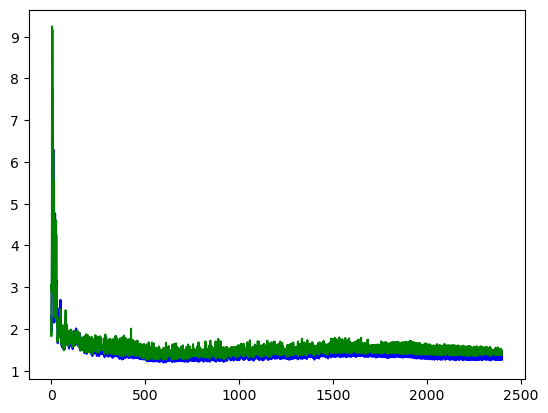

Epoch 2400: loss is 1.4650416671842672


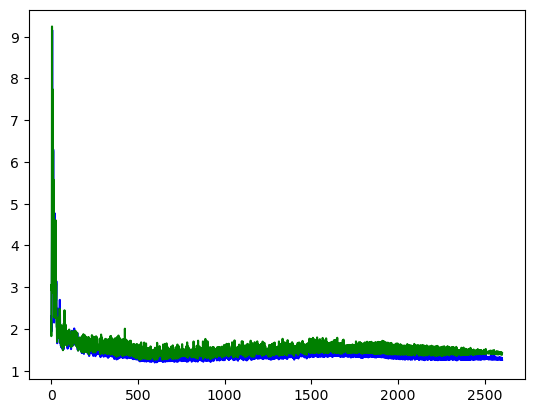

Epoch 2600: loss is 1.4193018503344448


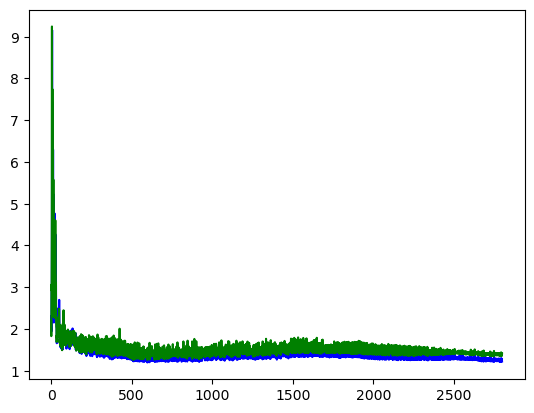

Epoch 2800: loss is 1.4087337275616876


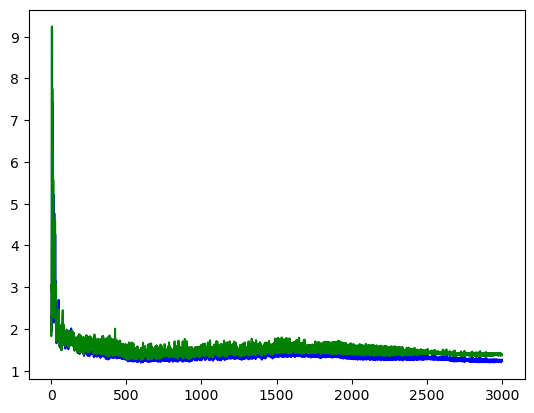

Epoch 3000: loss is 1.3727972552361831


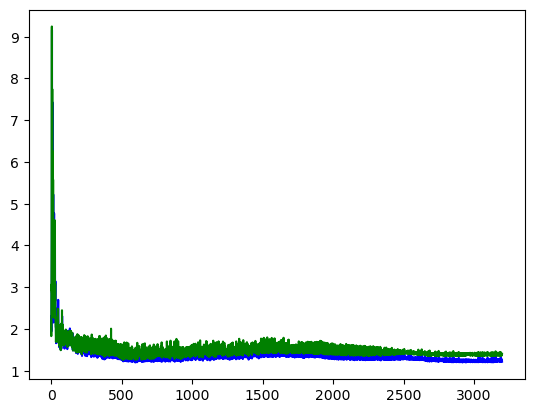

Epoch 3200: loss is 1.4029884583389645


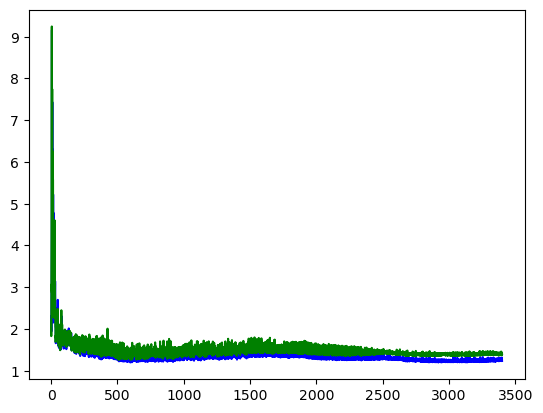

Epoch 3400: loss is 1.3836704147492322


In [198]:
num_epoch = 3500
learning_rate = 0.05
epochs_to_draw = 200
all_train_loss = []
all_val_loss = []
plt.ion()
SM = SoftmaxClassifier(5) #khởi tạo để dùng các hàm trong softmax.np cho tiện
count = 0
for e in range(num_epoch):
    #feedforward
    train_z1 = train_x@W1
    train_a1 = softmax(train_z1)
    train_z3 = train_a1@W3
    train_y_hat = softmax(train_z3)
    #Update weight
    train_E3 = (train_y_hat - train_y)
    train_E1 = train_E3@W3.T
    W3 = W3 - learning_rate*train_a1.T@train_E3
    W1 = W1 - learning_rate*train_x.T@train_E1
    train_loss = SM.compute_loss(train_y,train_y_hat)

#Valid:
    z1 = val_x@W1
    a1 = softmax(z1)
    z3 = a1@W3
    y_hat = softmax(z3)
    val_loss = SM.compute_loss(val_y,y_hat)
    all_train_loss.append(train_loss) 
    all_val_loss.append(val_loss)
    if (e % epochs_to_draw == epochs_to_draw-1):
        plot_loss(all_train_loss,all_val_loss)
        plt.show()
        plt.pause(0.1)
        print(f"Epoch {e+1}: loss is {val_loss}")
    tostop = 50
    if  e>tostop:
        if val_loss>=all_val_loss[e-1]:
            count +=1
        else:
            count = 0
        if (count==tostop):
            break

In [199]:
# Test: 
#Kết quả dù không chính xác nhưng khá giống với softmax_np.
z1 = test_x@W1
a1 = softmax(z1)
z3 = a1@W3
y_hat = softmax(z3)
test(y_hat,test_y)

Confusion matrix:
[[0.53 0.   0.02 0.15 0.   0.02 0.3  0.   0.04 0.  ]
 [0.13 0.84 0.   0.05 0.   0.   0.   0.   0.   0.  ]
 [0.07 0.02 0.52 0.03 0.19 0.02 0.04 0.   0.09 0.  ]
 [0.09 0.07 0.   0.6  0.   0.06 0.08 0.   0.   0.  ]
 [0.04 0.03 0.2  0.07 0.33 0.04 0.06 0.   0.15 0.  ]
 [0.   0.   0.   0.   0.   0.26 0.   0.51 0.02 0.27]
 [0.25 0.   0.28 0.07 0.19 0.04 0.21 0.   0.04 0.  ]
 [0.   0.   0.   0.   0.   0.02 0.   0.71 0.   0.27]
 [0.   0.   0.   0.07 0.   0.04 0.02 0.1  0.78 0.02]
 [0.   0.   0.   0.   0.   0.   0.   0.08 0.04 0.88]]
Diagonal values:
[0.53 0.84 0.52 0.6  0.33 0.26 0.21 0.71 0.78 0.88]
